Shape: (1338, 7)
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Missing values:
age         0
sex         0
bmi         0
children    0
s

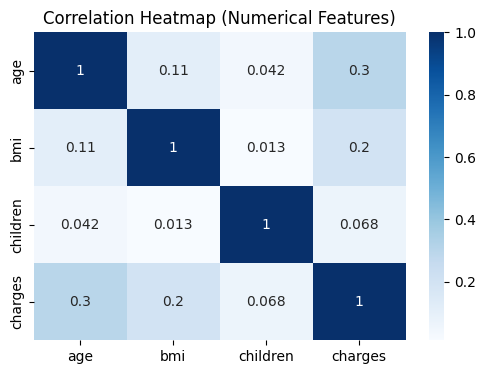

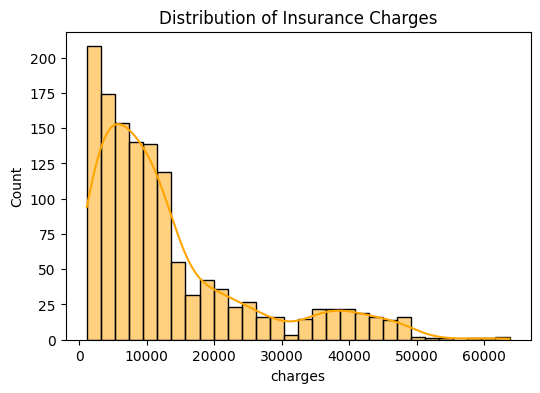

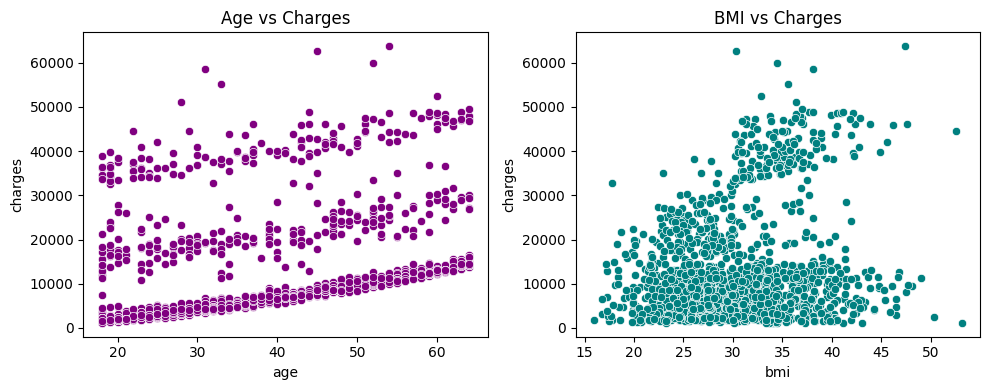

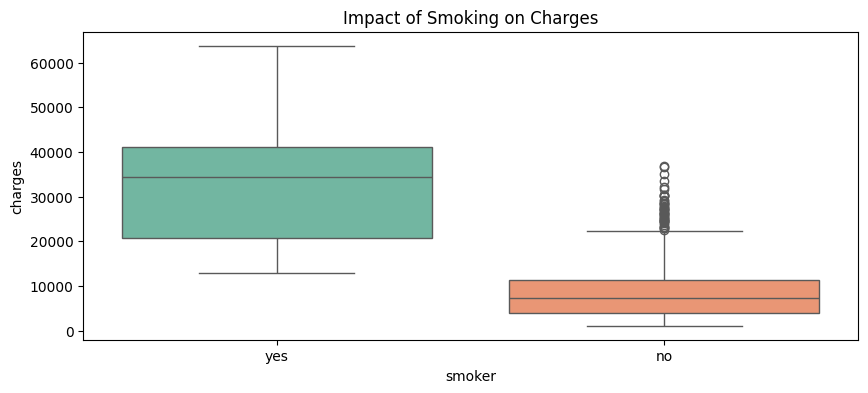


Categorical features: ['sex', 'smoker', 'region']
Numerical features: ['age', 'bmi', 'children']


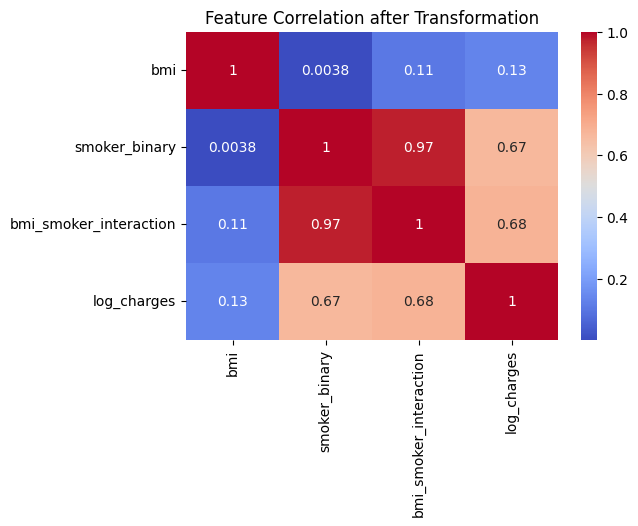

EDA and preprocessing complete.


In [3]:
# INSURANCE COST REGRESSION - EDA & PREPROCESSING

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("insurance.csv")

# Overview
print("Shape:", df.shape)
print(df.head())
print(df.info())

# Basic EDA

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary:")
print(df.describe())

# Correlation with target
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

# Target distribution
plt.figure(figsize=(6,4))
sns.histplot(df['charges'], bins=30, kde=True, color='orange')
plt.title("Distribution of Insurance Charges")
plt.show()

# Relationship between numerical features and charges
fig, axs = plt.subplots(1, 2, figsize=(10,4))
sns.scatterplot(x='age', y='charges', data=df, ax=axs[0], color='purple')
sns.scatterplot(x='bmi', y='charges', data=df, ax=axs[1], color='teal')
axs[0].set_title('Age vs Charges')
axs[1].set_title('BMI vs Charges')
plt.tight_layout()
plt.show()

# Categorical vs Target
plt.figure(figsize=(10,4))
sns.boxplot(x='smoker', y='charges', data=df, hue='smoker', palette='Set2', legend=False)
plt.title('Impact of Smoking on Charges')
plt.show()

# Preprocessing
# Define features and target
X = df.drop('charges', axis=1)
y = df['charges']

# Identify categorical and numerical columns
cat_features = X.select_dtypes(include=['object']).columns.tolist()
num_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\nCategorical features:", cat_features)
print("Numerical features:", num_features)

# --- Feature Engineering ---
# 1. Log transformation to reduce skewness in target
df['log_charges'] = np.log(df['charges'])

# 2. Create interaction feature between BMI and Smoker
df['smoker_binary'] = df['smoker'].map({'yes': 1, 'no': 0})
df['bmi_smoker_interaction'] = df['bmi'] * df['smoker_binary']

# You can visualize new correlations
plt.figure(figsize=(6,4))
sns.heatmap(df[['bmi', 'smoker_binary', 'bmi_smoker_interaction', 'log_charges']].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation after Transformation")
plt.show()

# Pipelines
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ]
)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("EDA and preprocessing complete.")


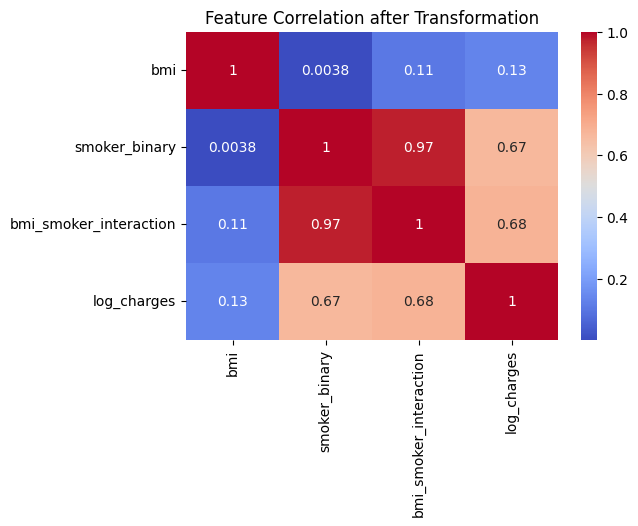

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("insurance.csv")

# --- Feature Engineering ---
# 1. Log transformation to reduce skewness in target
df['log_charges'] = np.log(df['charges'])

# 2. Create interaction feature between BMI and Smoker
df['smoker_binary'] = df['smoker'].map({'yes': 1, 'no': 0})
df['bmi_smoker_interaction'] = df['bmi'] * df['smoker_binary']

# You can visualize new correlations
plt.figure(figsize=(6,4))
sns.heatmap(df[['bmi', 'smoker_binary', 'bmi_smoker_interaction', 'log_charges']].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation after Transformation")
plt.show()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

 Linear Regression Results:
MAE: 4181.194 | RMSE: 5796.285 | R²: 0.784

 Feedforward NN Results:
MAE: 3979.785 | RMSE: 5687.129 | R²: 0.792

 Random Forest (Ensemble) Results:
MAE: 2522.787 | RMSE: 4591.932 | R²: 0.864

=== Model Comparison (Regression) ===
                      Model          MAE         RMSE        R2
0         Linear Regression  4181.194474  5796.284659  0.783593
1            Feedforward NN  3979.784578  5687.128810  0.791667
2  Random Forest (Ensemble)  2522.787424  4591.931853  0.864180


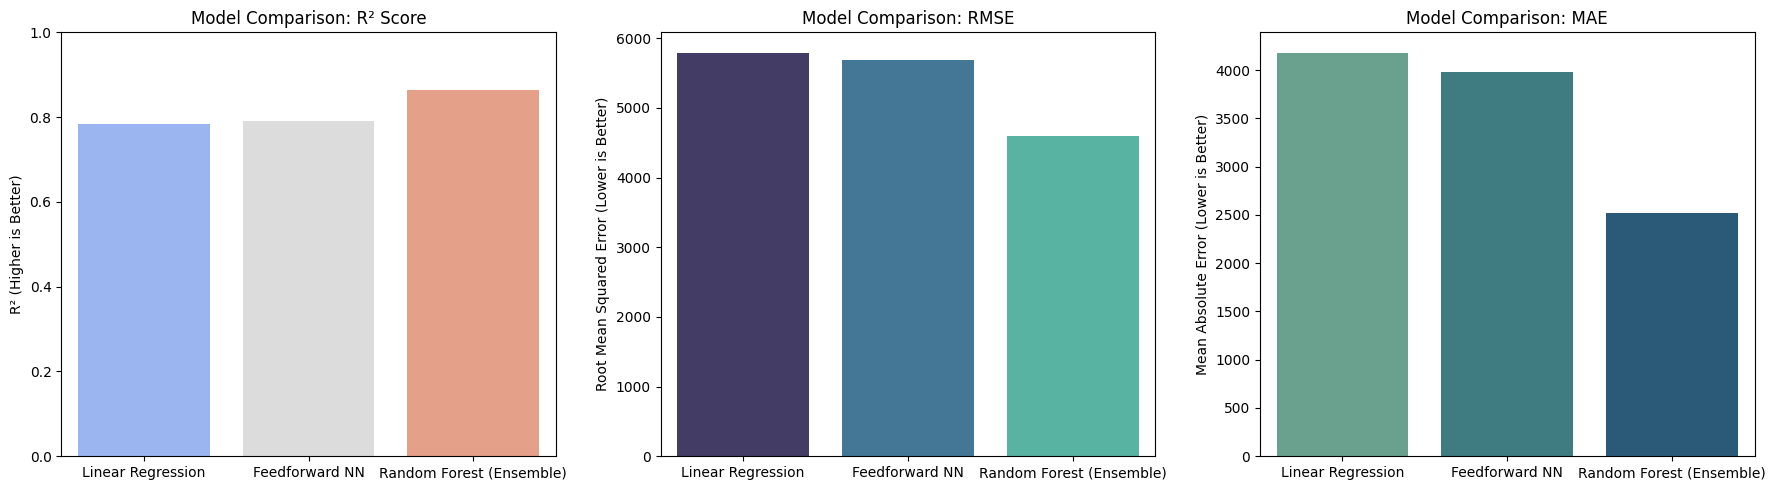

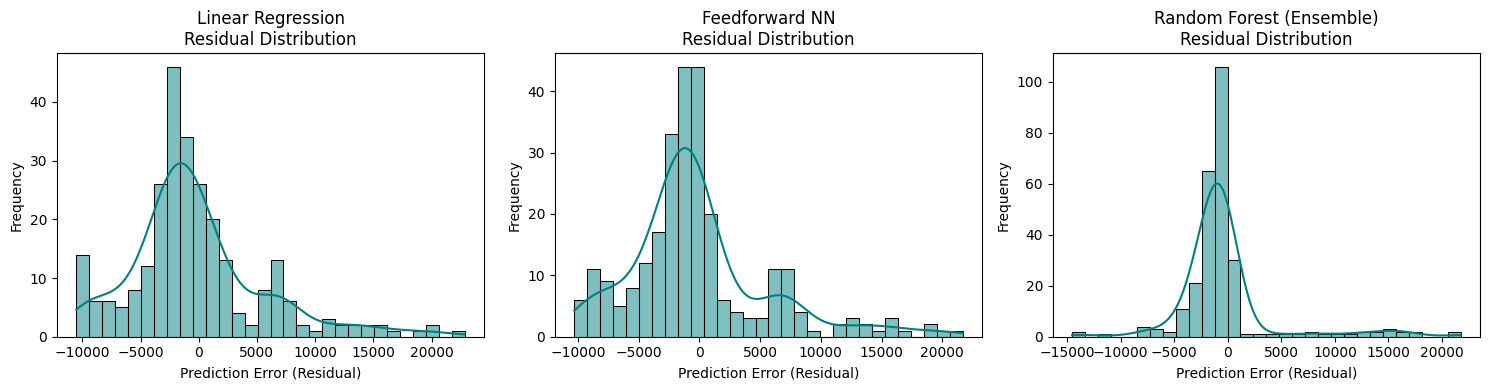

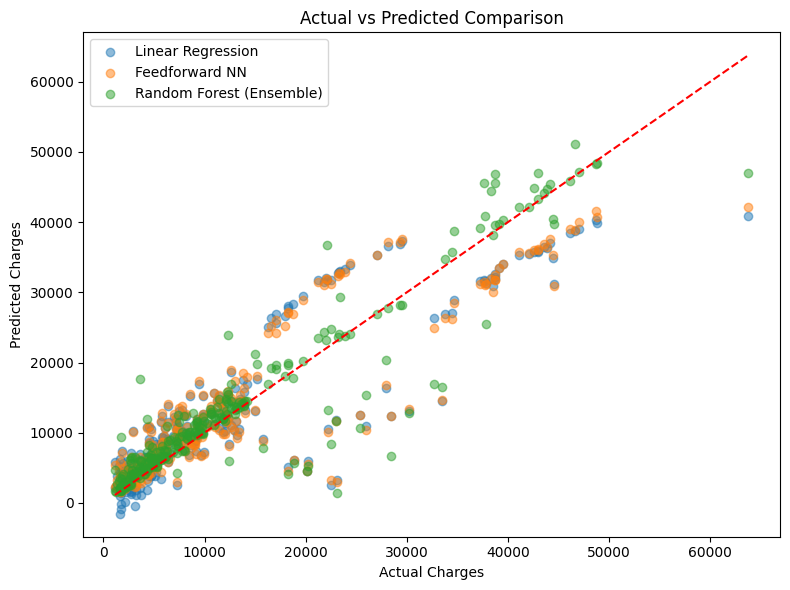

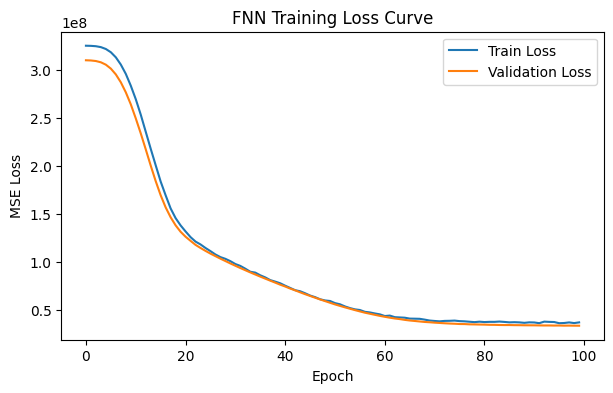


Regression model training, evaluation, and enhanced visualization (R², RMSE, MAE) complete.


In [7]:
# REGRESSION MODEL TRAINING & EVALUATION
# Linear Regression | Feedforward NN | Random Forest (Ensemble)

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras import Input, Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocess data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Linear Regression (Traditional)
lin_reg = LinearRegression()
lin_reg.fit(X_train_processed, y_train)
y_pred_lin = lin_reg.predict(X_test_processed)

# Feedforward Neural Network (Deep Learning)
input_dim = X_train_processed.shape[1]
model_fnn = Sequential([
    Input(shape=(input_dim,)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1)
])
model_fnn.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Early stopping: stop when validation loss stops improving; restore best weights
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model_fnn.fit(
    X_train_processed, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=0,
    callbacks=[early_stop]
)
y_pred_fnn = model_fnn.predict(X_test_processed).ravel()

# Random Forest (Ensemble)
rf_reg = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf_reg.fit(X_train_processed, y_train)
y_pred_rf = rf_reg.predict(X_test_processed)

# Evaluation Function
def evaluate_regression(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n {name} Results:")
    print(f"MAE: {mae:.3f} | RMSE: {rmse:.3f} | R²: {r2:.3f}")
    return [name, mae, rmse, r2]

# Evaluate all models
results_reg = []
results_reg.append(evaluate_regression("Linear Regression", y_test, y_pred_lin))
results_reg.append(evaluate_regression("Feedforward NN", y_test, y_pred_fnn))
results_reg.append(evaluate_regression("Random Forest (Ensemble)", y_test, y_pred_rf))

# Create summary table
results_reg_df = pd.DataFrame(results_reg, columns=["Model", "MAE", "RMSE", "R2"])
print("\n=== Model Comparison (Regression) ===")
print(results_reg_df)

# Visualization (enhanced – includes MAE graph)

# Comparison Bar Charts (R², RMSE, MAE)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(x="Model", y="R2", data=results_reg_df, hue="Model", palette="coolwarm", legend=False, ax=axes[0])
axes[0].set_title("Model Comparison: R² Score")
axes[0].set_ylabel("R² (Higher is Better)")
axes[0].set_xlabel("")
axes[0].set_ylim(0, 1)

sns.barplot(x="Model", y="RMSE", data=results_reg_df, hue="Model", palette="mako", legend=False, ax=axes[1])
axes[1].set_title("Model Comparison: RMSE")
axes[1].set_ylabel("Root Mean Squared Error (Lower is Better)")
axes[1].set_xlabel("")

sns.barplot(x="Model", y="MAE", data=results_reg_df, hue="Model", palette="crest", legend=False, ax=axes[2])
axes[2].set_title("Model Comparison: MAE")
axes[2].set_ylabel("Mean Absolute Error (Lower is Better)")
axes[2].set_xlabel("")

plt.tight_layout()
plt.show()

# Residual Distribution (acts like confusion matrix)
models_pred = {
    "Linear Regression": y_pred_lin,
    "Feedforward NN": y_pred_fnn,
    "Random Forest (Ensemble)": y_pred_rf
}

plt.figure(figsize=(15,4))
for i, (name, preds) in enumerate(models_pred.items(), 1):
    plt.subplot(1, 3, i)
    residuals = y_test - preds
    sns.histplot(residuals, bins=30, kde=True, color='teal')
    plt.title(f'{name}\nResidual Distribution')
    plt.xlabel('Prediction Error (Residual)')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Actual vs Predicted
plt.figure(figsize=(8,6))
for name, preds in models_pred.items():
    plt.scatter(y_test, preds, alpha=0.5, label=f'{name}')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted Comparison')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.legend()
plt.tight_layout()
plt.show()

# FNN Training Curve
plt.figure(figsize=(7,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('FNN Training Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

print("\nRegression model training, evaluation, and enhanced visualization (R², RMSE, MAE) complete.")


Fitting 3 folds for each of 27 candidates, totalling 81 fits

 Best Random Forest Parameters: {'max_depth': 8, 'min_samples_split': 6, 'n_estimators': 300}

 Training FNN with params: {'neurons1': 64, 'neurons2': 32, 'lr': 0.001, 'epochs': 50}

R² Score: 0.3873

 Training FNN with params: {'neurons1': 128, 'neurons2': 64, 'lr': 0.001, 'epochs': 80}
R² Score: 0.7858

 Training FNN with params: {'neurons1': 128, 'neurons2': 64, 'lr': 0.0005, 'epochs': 100}
R² Score: 0.6271

 Best FNN Parameters: {'neurons1': 128, 'neurons2': 64, 'lr': 0.001, 'epochs': 80}
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

 Feedforward NN (Tuned) Results:
MAE: 4111.065 | RMSE: 5766.199 | R²: 0.786

 Random Forest (Tuned) Results:
MAE: 2499.546 | RMSE: 4484.226 | R²: 0.870

=== Tuned Model Comparison (Regression) ===
                    Model          MAE         RMSE        R2
0  Feedforward NN (Tuned)  4111.064501  5766.198801  0.785834
1   Random Forest (Tuned)  2499.546180  4484.226024  0.870477


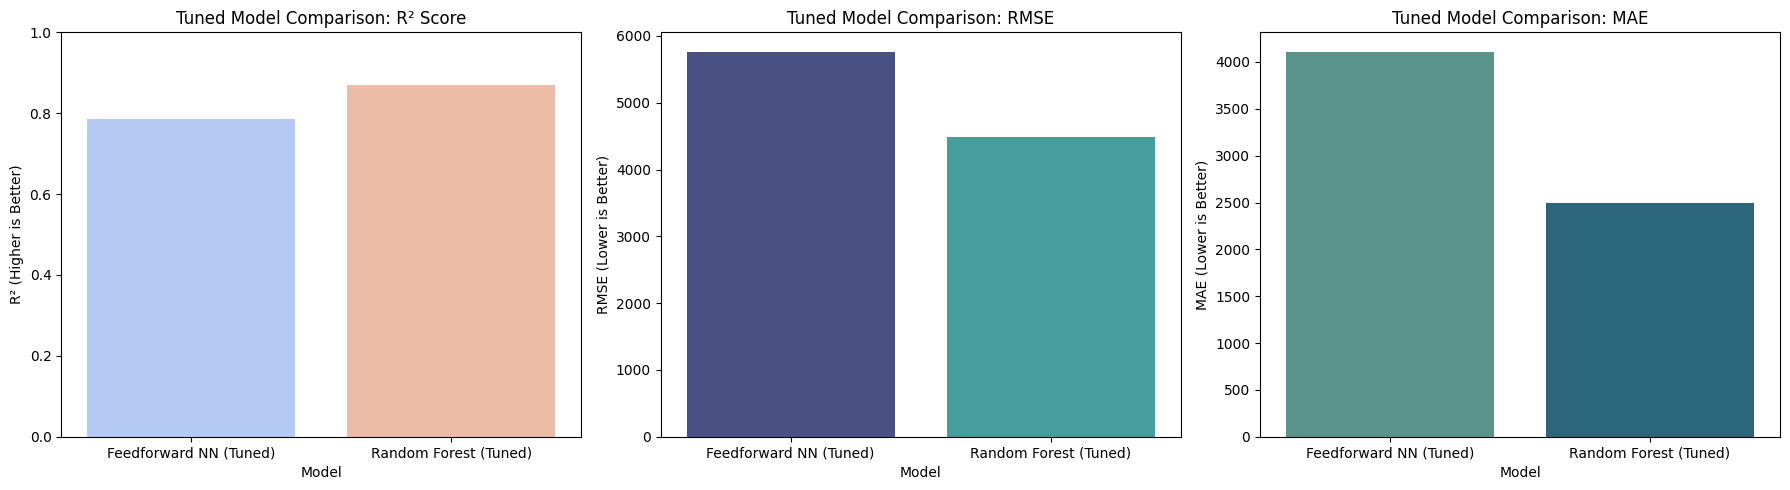


 Regression model tuning and comparison completed successfully.


In [9]:
# MODEL TUNING (Regression)
# Random Forest | Feedforward Neural Network

from sklearn.model_selection import GridSearchCV
from tensorflow.keras import backend as K

# Random Forest Regressor Tuning (GridSearchCV)
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [8, 10, 12],
    'min_samples_split': [2, 4, 6]
}

grid_rf = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid=param_grid_rf,
    scoring='r2',
    cv=3,
    verbose=1,
    n_jobs=-1
)
grid_rf.fit(X_train_processed, y_train)

best_rf = grid_rf.best_estimator_
print("\n Best Random Forest Parameters:", grid_rf.best_params_)

y_pred_rf_tuned = best_rf.predict(X_test_processed)


# Feedforward Neural Network Tuning (Manual Search)
fnn_param_grid = [
    {'neurons1': 64, 'neurons2': 32, 'lr': 0.001, 'epochs': 50},
    {'neurons1': 128, 'neurons2': 64, 'lr': 0.001, 'epochs': 80},
    {'neurons1': 128, 'neurons2': 64, 'lr': 0.0005, 'epochs': 100}
]

best_r2 = -np.inf
best_params_fnn = None

for params in fnn_param_grid:
    print(f"\n Training FNN with params: {params}")
    K.clear_session()

    model = Sequential([
        Input(shape=(X_train_processed.shape[1],)),
        Dense(params['neurons1'], activation='relu'),
        Dropout(0.3),
        Dense(params['neurons2'], activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=params['lr']),
                  loss='mse',
                  metrics=['mae'])

    model.fit(X_train_processed, y_train,
              validation_split=0.2,
              epochs=params['epochs'],
              batch_size=32,
              verbose=0)

    y_pred = model.predict(X_test_processed, verbose=0).ravel()
    r2 = r2_score(y_test, y_pred)
    print(f"R² Score: {r2:.4f}")

    if r2 > best_r2:
        best_r2 = r2
        best_params_fnn = params
        best_model_fnn = model

print("\n Best FNN Parameters:", best_params_fnn)
y_pred_fnn_tuned = best_model_fnn.predict(X_test_processed).ravel()


# Evaluate Tuned Models
def evaluate_regression(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n {name} Results:")
    print(f"MAE: {mae:.3f} | RMSE: {rmse:.3f} | R²: {r2:.3f}")
    return [name, mae, rmse, r2]

results_tuned = []
results_tuned.append(evaluate_regression("Feedforward NN (Tuned)", y_test, y_pred_fnn_tuned))
results_tuned.append(evaluate_regression("Random Forest (Tuned)", y_test, y_pred_rf_tuned))

results_tuned_df = pd.DataFrame(results_tuned, columns=["Model", "MAE", "RMSE", "R2"])
print("\n=== Tuned Model Comparison (Regression) ===")
print(results_tuned_df)


# Visualization: Tuned Model Comparison

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(x="Model", y="R2", data=results_tuned_df, hue="Model", palette="coolwarm", legend=False, ax=axes[0])
axes[0].set_title("Tuned Model Comparison: R² Score")
axes[0].set_ylabel("R² (Higher is Better)")
axes[0].set_ylim(0, 1)

sns.barplot(x="Model", y="RMSE", data=results_tuned_df, hue="Model", palette="mako", legend=False, ax=axes[1])
axes[1].set_title("Tuned Model Comparison: RMSE")
axes[1].set_ylabel("RMSE (Lower is Better)")

sns.barplot(x="Model", y="MAE", data=results_tuned_df, hue="Model", palette="crest", legend=False, ax=axes[2])
axes[2].set_title("Tuned Model Comparison: MAE")
axes[2].set_ylabel("MAE (Lower is Better)")

plt.tight_layout()
plt.show()

print("\n Regression model tuning and comparison completed successfully.")


Fitting 3 folds for each of 27 candidates, totalling 81 fits

 Best Random Forest Parameters: {'max_depth': 8, 'min_samples_split': 6, 'n_estimators': 300}
 Training FNN with params: {'neurons1': 64, 'neurons2': 32, 'lr': 0.001, 'epochs': 50}
Best val_loss: 98542416.0000
 Training FNN with params: {'neurons1': 128, 'neurons2': 64, 'lr': 0.001, 'epochs': 80}
Best val_loss: 35290260.0000
 Training FNN with params: {'neurons1': 128, 'neurons2': 64, 'lr': 0.0005, 'epochs': 100}
Best val_loss: 57582304.0000

 Best FNN Parameters (by val loss): {'neurons1': 128, 'neurons2': 64, 'lr': 0.001, 'epochs': 80}

 Linear Regression (Baseline) Results:
MAE: 4181.194 | RMSE: 5796.285 | R²: 0.784

 Feedforward NN (Tuned) Results:
MAE: 4176.357 | RMSE: 5815.180 | R²: 0.782

 Random Forest (Tuned) Results:
MAE: 2499.546 | RMSE: 4484.226 | R²: 0.870

=== Tuned Model Comparison (Regression) ===
                          Model          MAE         RMSE        R2
0  Linear Regression (Baseline)  4181.194474 

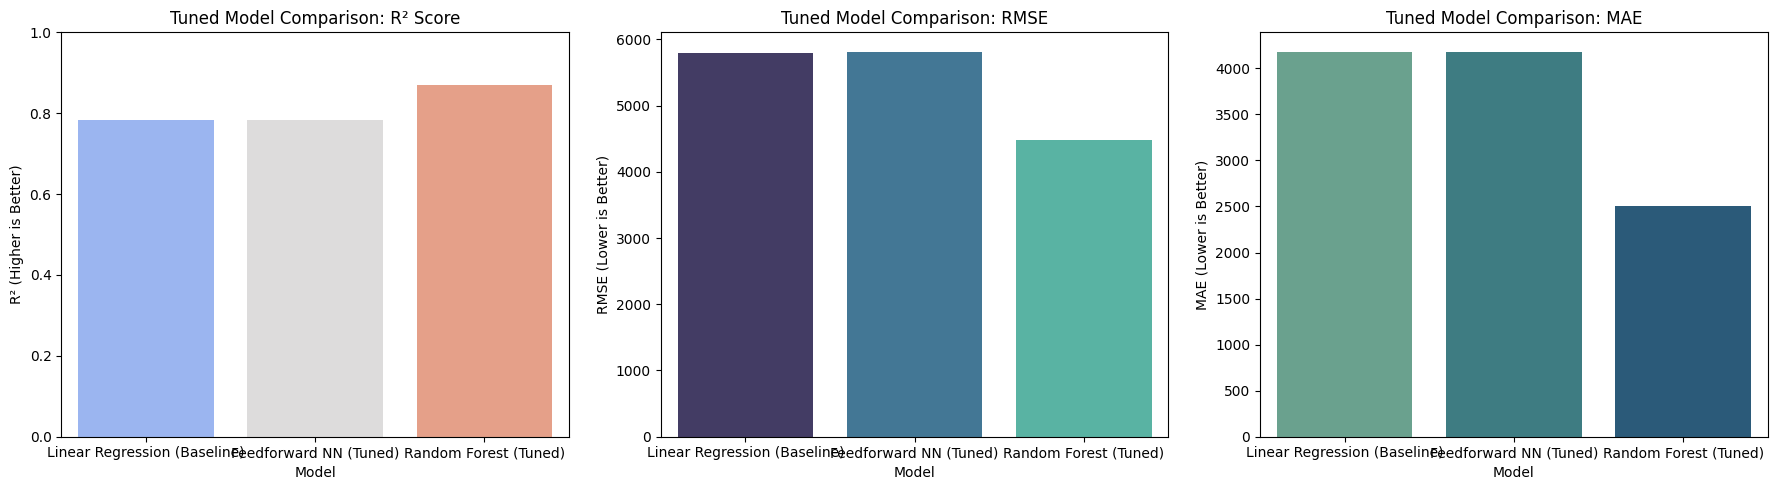

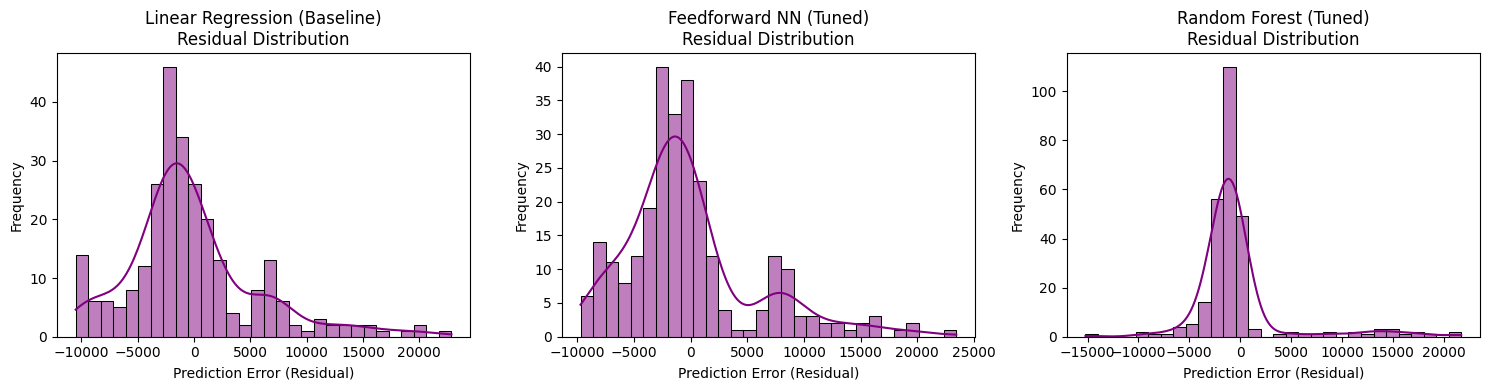

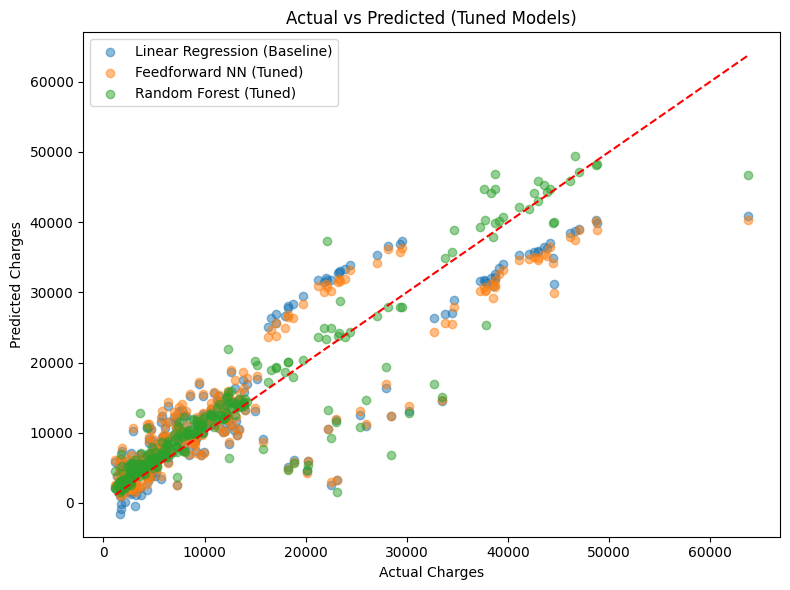


 Regression tuning (Linear, FNN, Random Forest) completed successfully.


In [15]:
# MODEL TUNING (Regression)
# Linear Regression | Feedforward NN | Random Forest

from sklearn.model_selection import GridSearchCV
from tensorflow.keras import backend as K


#  Helper function for consistent evaluation
def evaluate_regression(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n {name} Results:")
    print(f"MAE: {mae:.3f} | RMSE: {rmse:.3f} | R²: {r2:.3f}")
    return [name, mae, rmse, r2]


#  Random Forest Regressor Tuning (GridSearchCV)
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [8, 10, 12],
    'min_samples_split': [2, 4, 6]
}

grid_rf = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid=param_grid_rf,
    scoring='r2',
    cv=3,
    verbose=1,
    n_jobs=-1
)
grid_rf.fit(X_train_processed, y_train)

best_rf = grid_rf.best_estimator_
print("\n Best Random Forest Parameters:", grid_rf.best_params_)

y_pred_rf_tuned = best_rf.predict(X_test_processed)


# Feedforward Neural Network Tuning (Manual Search)
fnn_param_grid = [
    {'neurons1': 64,  'neurons2': 32, 'lr': 0.001,  'epochs': 50},
    {'neurons1': 128, 'neurons2': 64, 'lr': 0.001,  'epochs': 80},
    {'neurons1': 128, 'neurons2': 64, 'lr': 0.0005, 'epochs': 100},
]

best_val = np.inf        # track best validation loss (lower is better)
best_params_fnn = None
best_model_fnn = None

for params in fnn_param_grid:
    print(f" Training FNN with params: {params}")
    K.clear_session()

    model = Sequential([
        Input(shape=(X_train_processed.shape[1],)),
        Dense(params['neurons1'], activation='relu'),
        Dropout(0.3),
        Dense(params['neurons2'], activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=params['lr']),
                  loss='mse',
                  metrics=['mae'])

    es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=0)

    hist = model.fit(
        X_train_processed, y_train,
        validation_split=0.2,       # select best by validation, not test
        epochs=params['epochs'],
        batch_size=32,
        verbose=0,
        callbacks=[es]
    )

    # Use best validation loss as selection criterion
    current_best_val = min(hist.history['val_loss'])
    print(f"Best val_loss: {current_best_val:.4f}")

    if current_best_val < best_val:
        best_val = current_best_val
        best_params_fnn = params
        best_model_fnn = model

print("\n Best FNN Parameters (by val loss):", best_params_fnn)
y_pred_fnn_tuned = best_model_fnn.predict(X_test_processed, verbose=0).ravel()


# Linear Regression (Baseline)
lin_reg = LinearRegression()
lin_reg.fit(X_train_processed, y_train)
y_pred_lin = lin_reg.predict(X_test_processed)


# Combine Results
results_tuned = []
results_tuned.append(evaluate_regression("Linear Regression (Baseline)", y_test, y_pred_lin))
results_tuned.append(evaluate_regression("Feedforward NN (Tuned)", y_test, y_pred_fnn_tuned))
results_tuned.append(evaluate_regression("Random Forest (Tuned)", y_test, y_pred_rf_tuned))

results_tuned_df = pd.DataFrame(results_tuned, columns=["Model", "MAE", "RMSE", "R2"])
print("\n=== Tuned Model Comparison (Regression) ===")
print(results_tuned_df)


# Visualization: Tuned Model Comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(x="Model", y="R2", data=results_tuned_df, hue="Model", palette="coolwarm", legend=False, ax=axes[0])
axes[0].set_title("Tuned Model Comparison: R² Score")
axes[0].set_ylabel("R² (Higher is Better)")
axes[0].set_ylim(0, 1)

sns.barplot(x="Model", y="RMSE", data=results_tuned_df, hue="Model", palette="mako", legend=False, ax=axes[1])
axes[1].set_title("Tuned Model Comparison: RMSE")
axes[1].set_ylabel("RMSE (Lower is Better)")

sns.barplot(x="Model", y="MAE", data=results_tuned_df, hue="Model", palette="crest", legend=False, ax=axes[2])
axes[2].set_title("Tuned Model Comparison: MAE")
axes[2].set_ylabel("MAE (Lower is Better)")

plt.tight_layout()
plt.show()


#  Residual Distribution & Actual vs Predicted
tuned_preds = {
    "Linear Regression (Baseline)": y_pred_lin,
    "Feedforward NN (Tuned)": y_pred_fnn_tuned,
    "Random Forest (Tuned)": y_pred_rf_tuned
}

# Residuals
plt.figure(figsize=(15,4))
for i, (name, preds) in enumerate(tuned_preds.items(), 1):
    plt.subplot(1, 3, i)
    residuals = y_test - preds
    sns.histplot(residuals, bins=30, kde=True, color='purple')
    plt.title(f'{name}\nResidual Distribution')
    plt.xlabel('Prediction Error (Residual)')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Actual vs Predicted
plt.figure(figsize=(8,6))
for name, preds in tuned_preds.items():
    plt.scatter(y_test, preds, alpha=0.5, label=name)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted (Tuned Models)')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.legend()
plt.tight_layout()
plt.show()

print("\n Regression tuning (Linear, FNN, Random Forest) completed successfully.")




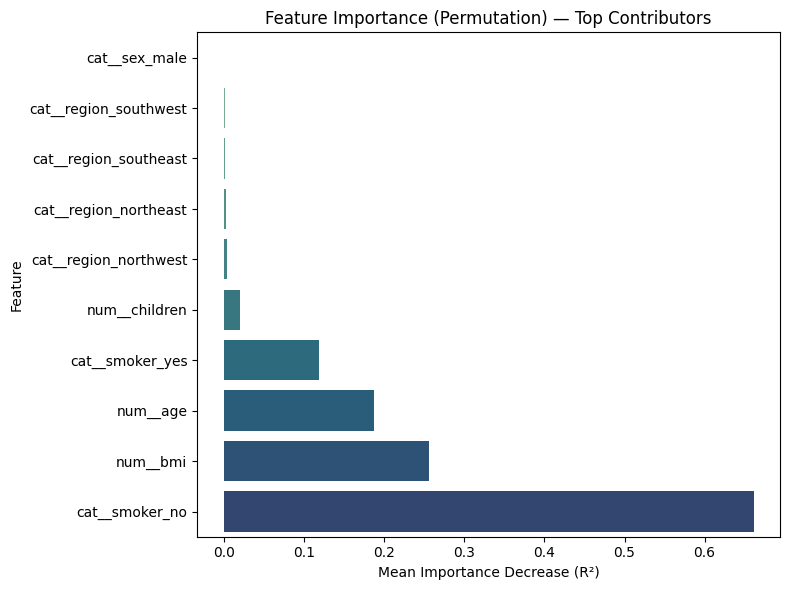

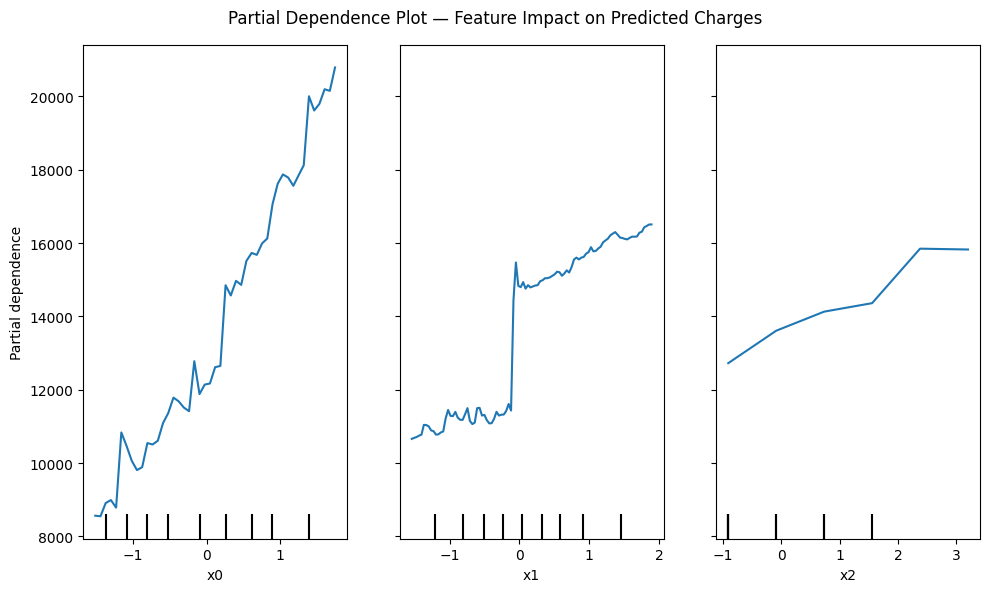

In [25]:
# =============================================
# MODEL EXPLAINABILITY (Regression)
# =============================================

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
import numpy as np

# Safely create feature names (if missing)
try:
    feature_names = preprocessor.get_feature_names_out()
except Exception:
    feature_names = [f"Feature_{i}" for i in range(X_test_processed.shape[1])]

#  Use your best-performing model
model = best_rf

# =============================================
# Figure 1.7: Permutation Feature Importance
# =============================================
perm_result = permutation_importance(
    model, X_test_processed, y_test,
    n_repeats=10, random_state=42, scoring='r2'
)

sorted_idx = np.argsort(perm_result.importances_mean)
top_features = np.array(feature_names)[sorted_idx][-10:]

plt.figure(figsize=(8, 6))
sns.barplot(
    x=perm_result.importances_mean[sorted_idx][-10:],
    y=top_features,
    hue=top_features,  # avoids future warning
    palette="crest",
    legend=False
)
plt.title("Feature Importance (Permutation) — Top Contributors")
plt.xlabel("Mean Importance Decrease (R²)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# =============================================
# Partial Dependence Plots (Top Features)
# =============================================

# Only numeric features can be plotted — select top few
numeric_indices = [i for i, name in enumerate(feature_names) if "num" in name]
if len(numeric_indices) == 0:
    numeric_indices = range(min(3, len(feature_names)))  # fallback if not found

# Create the PDP plot
fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(
    model,
    X_test_processed,
    features=list(numeric_indices)[:3],
    kind="average",
    ax=ax
)

# Add title and clean formatting
plt.suptitle("Partial Dependence Plot — Feature Impact on Predicted Charges", fontsize=12)
plt.tight_layout()

# Optional: add gridlines for better visual clarity
for axis in np.ravel(ax):
    axis.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)

plt.show()